In [1]:
import orchest
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import numpy as np

In [2]:
inputs = orchest.get_inputs()
model = inputs["model"]
trainX, trainY, testX, testY = inputs["XY_data"]

2022-02-08 07:32:17.948154: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-08 07:32:17.948641: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2022-02-08 07:32:20.901955: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-08 07:32:20.902027: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-08 07:32:20.902131: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (5376978d9dea): /proc/driver/nvidia/version does not exist
2022-02-08 07:32:20.902512: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [4]:
# Error of predictions
train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
# Print RMSE
print('Train RMSE: %.3f RMSE' % (train_rmse))
print('Test RMSE: %.3f RMSE' % (test_rmse))  



Train RMSE: 0.067 RMSE
Test RMSE: 0.111 RMSE


Text(0.5, 1.0, 'Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

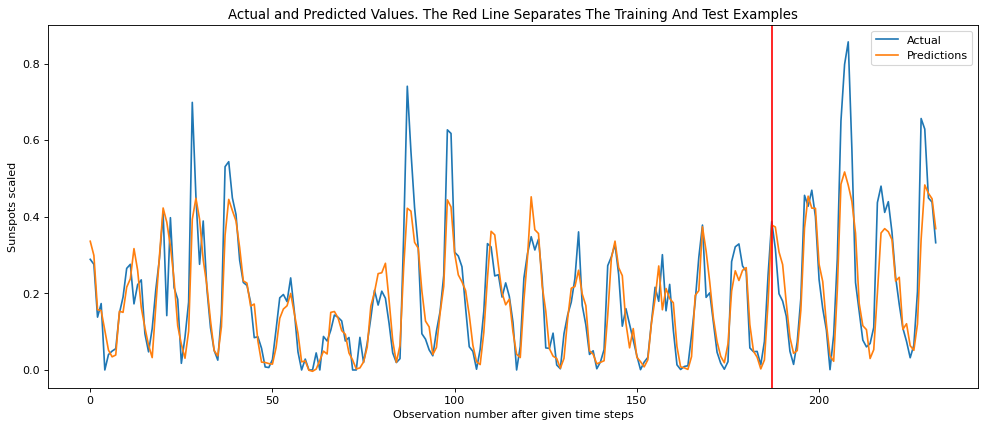

In [5]:
actual = np.append(trainY, testY)
predictions = np.append(train_predict, test_predict)
rows = len(actual)
plt.figure(figsize=(15, 6), dpi=80)
plt.plot(range(rows), actual)
plt.plot(range(rows), predictions)
plt.axvline(x=len(trainY), color='r')
plt.legend(['Actual', 'Predictions'])
plt.xlabel('Observation number after given time steps')
plt.ylabel('Sunspots scaled')
plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')